In [3]:
import numpy as np
import pandas
import pylab as plt  # matplotlib的一个子包
from PyEMD import EMD, EEMD, Visualisation  # Visualisation 可能缺引numpy
from scipy import stats
from utils import eemd_tools
from utils.constants import const

# 导入数据

In [4]:
filename = const.PROJECT_DIR + "/data/apple_interpolate.csv"
dataset = eemd_tools.load_data_to_signal(filename)
times = np.arange(len(dataset))  # or dataset.shape[0]
print("s's shape: ", dataset.shape)
print("t's lenth: ", times.shape)
print(dataset)
print(times)

s's shape:  (1901,)
t's lenth:  (1901,)
[10.71 10.71 10.71 ...  9.5   9.5   9.5 ]
[   0    1    2 ... 1898 1899 1900]


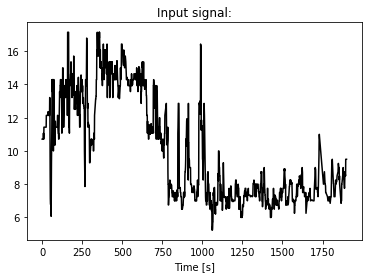

In [6]:
# Plot original series
plt.plot(times, dataset, 'k')
plt.title("Input signal:")
plt.xlabel("Time [s]")
plt.show()

In [7]:
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size

# 注意由于划分了训练集和测试集，总的samples数目会减少：len(dataset - lookback) - (len(trainX)+len(testX))
# can do this after create_dataset()

train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
times_train = times[0:train_size]
print(len(train), len(test))
print(len(dataset) == len(train)+len(test))
print(train)
# print(test)

1520 381
True
[10.71 10.71 10.71 ...  8.25  7.75  8.  ]


# EEMD

In [9]:
# fix random seed for reproducibility
np.random.seed(7)

# Extract imfs and residue， In case of EMD
eemd = EEMD()
imfs_train = eemd(train)
res_train = imfs_train[-1, :]
imfs_train = imfs_train[0:-1, :]
print(imfs_train.shape)

(12, 1520)


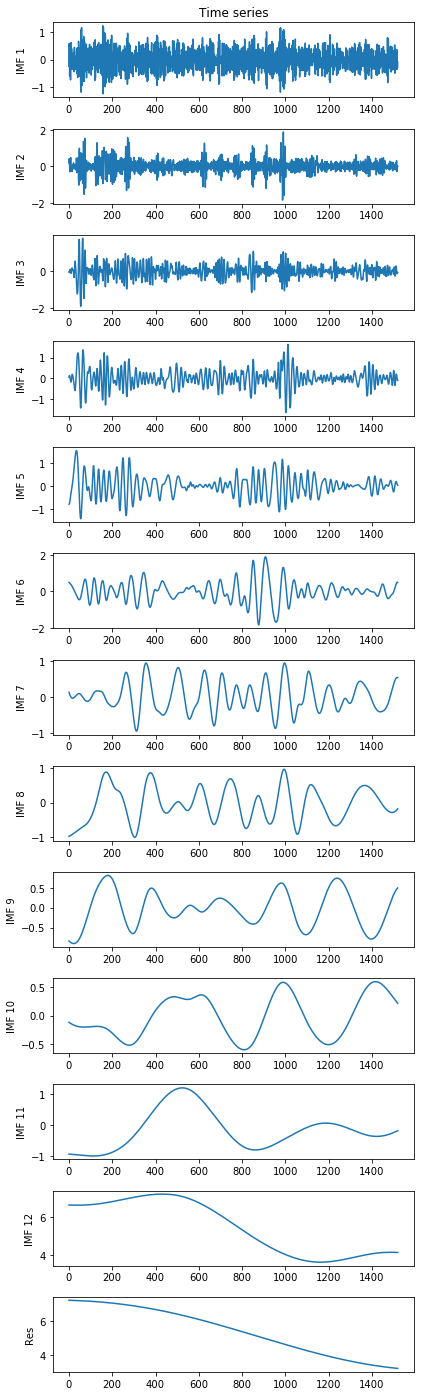

In [10]:
vis = Visualisation()
vis.plot_imfs(imfs=imfs_train, residue=res_train, t=times_train, include_residue=True)
# vis.plot_instant_freq(t, imfs=imfs)
vis.show()

## 高频-低频重构

In [12]:
imf_fine, imf_coarse, df, index = eemd_tools.fine_to_coarse(imfs_train)
print("n=%d" % (index))
print(imf_fine)
print(imf_coarse)

format = lambda x: "%.4f" % x
df[1] = df[1].map(format)

# test fine_to_coarse(imfs)
diff = train - imf_fine - imf_coarse - res_train
print(diff)
print(df)
# df.to_excel("data/eemd/pig-train-t.xlsx")  # doctest: +SKIP

n=9
[-1.18947561 -0.12280856 -0.58691778 ...  0.4562146   0.41453294
  0.65152443]
[4.70953765 4.70042029 4.69153451 ... 4.6564596  4.66096714 4.66514735]
[-0.02144203 -1.07869589 -0.60539971 ... -0.07672018 -0.53830906
 -0.52825103]
        1         2         3         4         5         6         7   \
t  -0.7777 -0.395972 -0.519812 -0.447324 -0.435075  -0.53925 -0.194628   
p   0.4369  0.692181   0.60327  0.654705   0.66357  0.589793   0.84571   

         8          9           10           11       12  
t  -1.42874   -2.14507    -2.64316     -6.33227  87.3511  
p  0.153285  0.0321055  0.00829803  3.17386e-10        0  


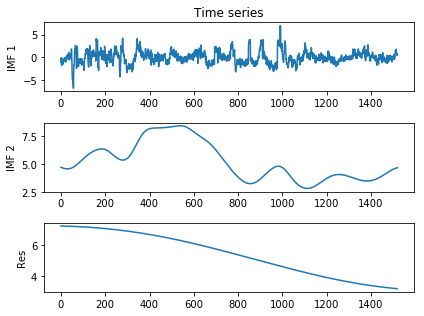

In [13]:
train_re = np.vstack((imf_fine, imf_coarse)) 

vis = Visualisation()
vis.plot_imfs(imfs=train_re, residue=res_train, t=times_train, include_residue=True)
# vis.plot_instant_freq(t, imfs=imfs)
vis.show()